## Machine learning: Red Wine quality prediction

The objectif of this work is to predict th quality of the red wine. 
For to achieve this goal, three model of machine learning were build. 
Logistic regression
Random Forest 
SVM regression
Before any estamation, we made a description of our data base, to help to better understand
This target variable is quality , a categorial variable with 5 modalities, which are split finally in categorial variable with 2 modalities
The Data base come from Kaggle 

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

In [2]:
#import data set 
data= pd.read_csv(r"C:\Users\33758\Desktop\Cours APE\winequality_red_y.csv",sep=';')

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free _sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data checching : types , NAN, NULL

In [4]:
#Voir les différentes informataions sur les colonnes de ma base de donnée 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free _sulfur_dioxide  1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()
#Combien de valeur nulle dans chaque colonne de ma database

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free _sulfur_dioxide    0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.isna().sum()
#combien de valeur NA j'ai dans ma base de donnée

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free _sulfur_dioxide    0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Ther is no NA and null value, our data is clean 

### Data description

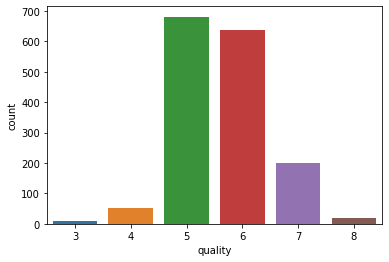

In [8]:
#quality 
sns.countplot(x='quality', data=data)

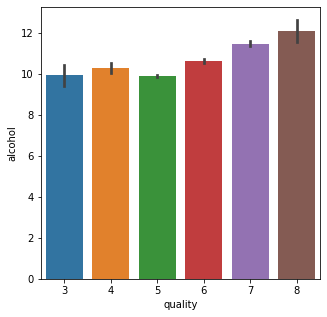

In [9]:
#quality alcohol
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

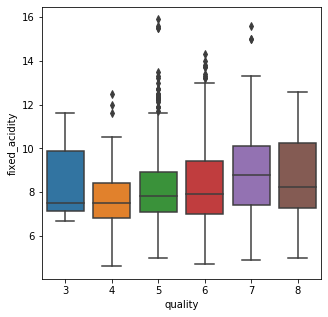

In [10]:
#quality acidity
fig = plt.figure(figsize = (5,5))
sns.boxplot(x = 'quality', y = 'fixed_acidity', data = data)

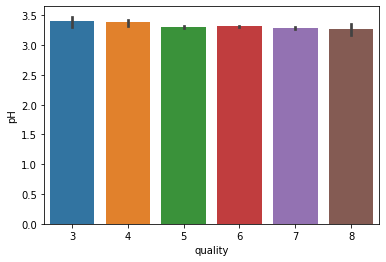

In [11]:
#quality ph 
sns.barplot(x="quality",y="pH",data=data)

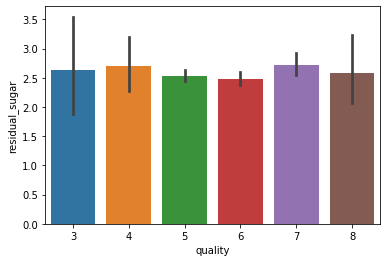

In [12]:
#quality residual sugar 
sns.barplot(x="quality",y='residual_sugar',data=data)

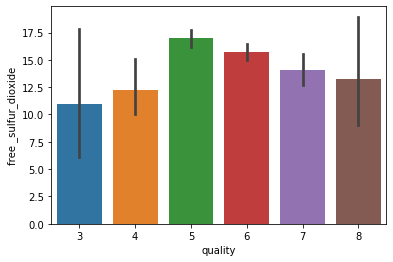

In [13]:
sns.barplot(x="quality",y='free _sulfur_dioxide',data=data) 

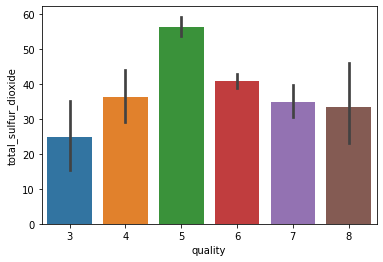

In [14]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=data)

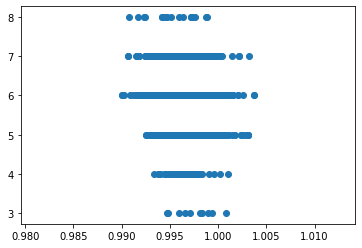

In [15]:
plt.scatter(x="density", y='quality',data=data)

In [16]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
qual=[1 if i>5 else 0 for i in data['quality']]

In [18]:
data['qual']=qual

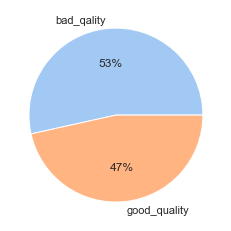

In [38]:
#define data
df=data['qual'].value_counts()
labels = ['bad_qality','good_quality']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

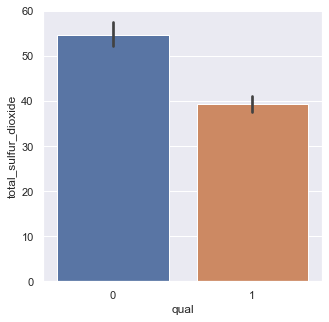

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x='qual',y='total_sulfur_dioxide',data=data)

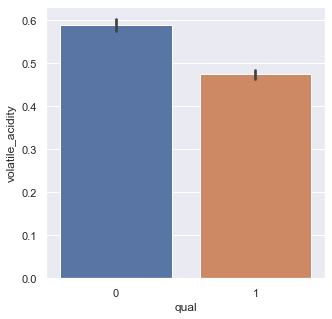

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x="qual",y='volatile_acidity',data=data)

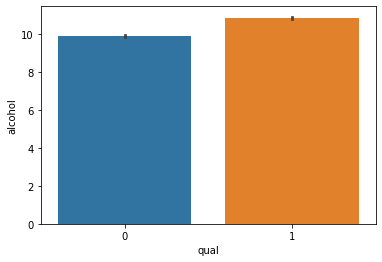

In [22]:
sns.barplot(x="qual",y='alcohol',data=data)

<AxesSubplot:xlabel='qual', ylabel='density'>

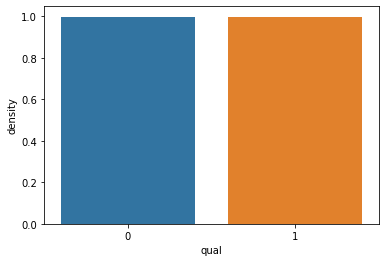

In [93]:
sns.barplot(x="qual",y='density',data=data)

<AxesSubplot:xlabel='qual', ylabel='citric_acid'>

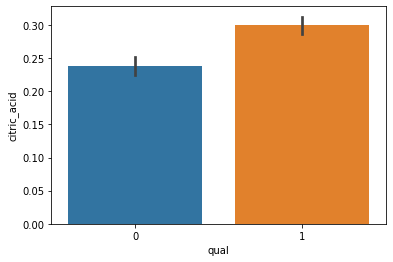

In [95]:
sns.barplot(x="qual",y='citric_acid',data=data)

<AxesSubplot:xlabel='qual', ylabel='sulphates'>

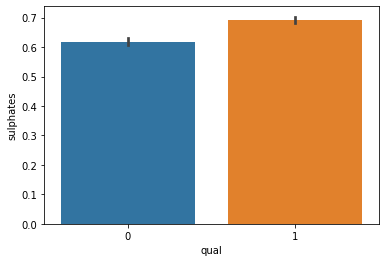

In [96]:
sns.barplot(x="qual",y='sulphates',data=data)

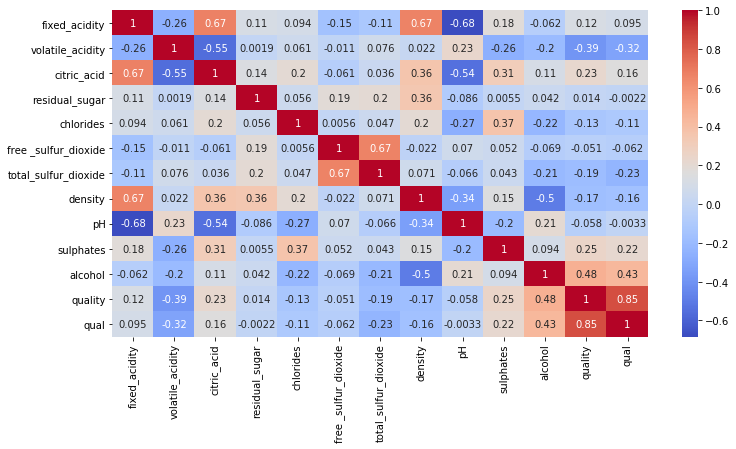

In [25]:
#Avant tout regression , il faut voir quelle variable est liée es
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [ ]:
#We see that we have not hight correlation between our target variable and our features 
#Lets see the some graphocal 

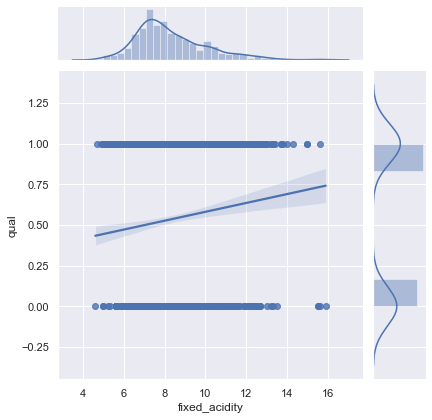

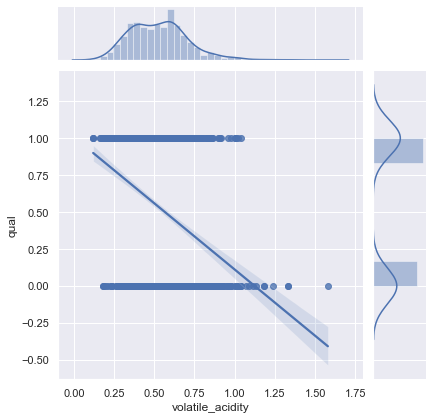

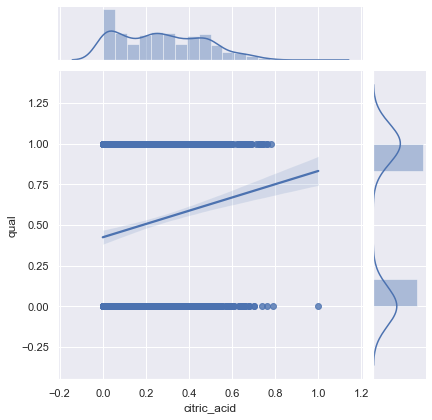

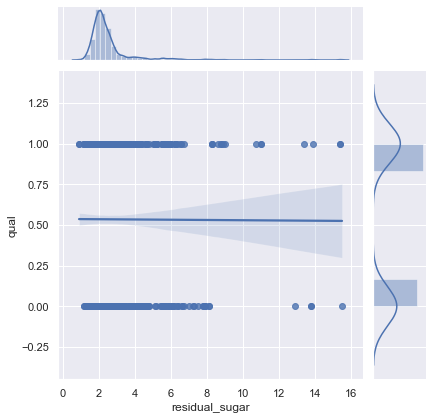

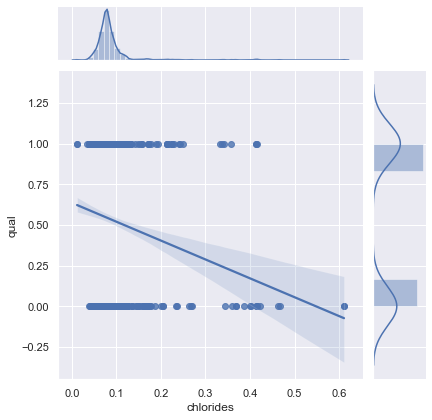

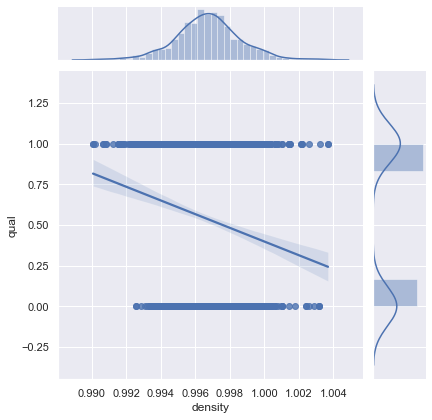

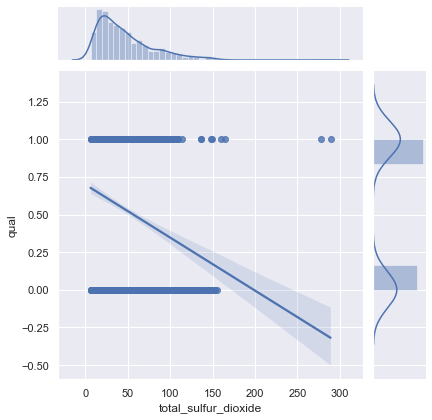

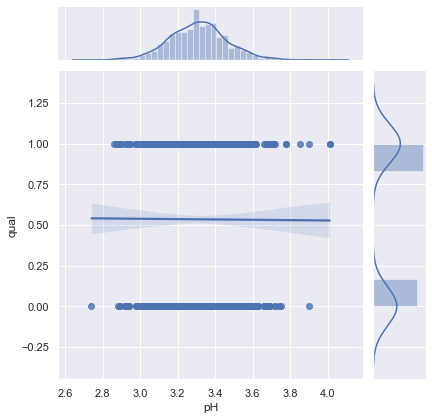

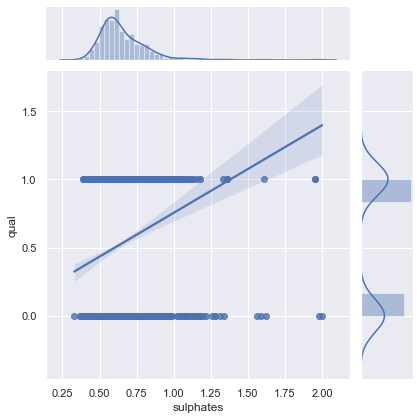

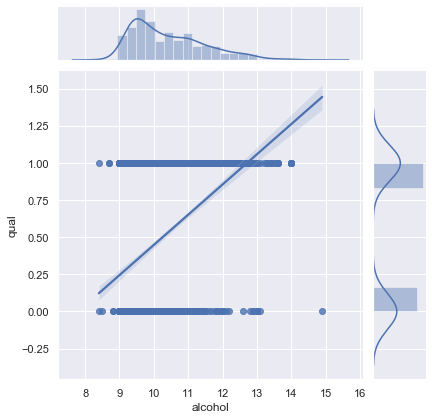

In [47]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="fixed_acidity", y="qual", data=data, kind="reg");
sns.jointplot(x="volatile_acidity", y="qual", data=data, kind="reg");
sns.jointplot(x="citric_acid", y="qual", data=data, kind="reg");
sns.jointplot(x="residual_sugar", y="qual", data=data, kind="reg");
sns.jointplot(x="chlorides", y="qual", data=data, kind="reg");
sns.jointplot(x="density", y="qual", data=data, kind="reg");
sns.jointplot(x="total_sulfur_dioxide", y="qual", data=data, kind="reg");
sns.jointplot(x="pH", y="qual", data=data, kind="reg");
sns.jointplot(x="sulphates", y="qual", data=data, kind="reg");
sns.jointplot(x="alcohol", y="qual", data=data, kind="reg");

In [ ]:
#After this two graph , we can take fixed_accidity, volatile_acidity, citric_acid,chloride, density, total_sulfur_dixiode, sulphates,alcohol

In [68]:
# Specifying dependent and independent variables
X = data.drop(['quality','qual',"residual_sugar","pH"], axis = 1)
y = data['qual']

In [69]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [70]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
logreg = LogisticRegression(solver='liblinear', random_state = 0)
# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 76.56%


In [73]:
print('MAE: ',metrics.mean_absolute_error(y_test, logreg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, logreg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, logreg.predict(X_test))))

MAE:  0.234375
MSE:  0.234375
RMSE: 0.4841229182759271


In [ ]:
#The accuracy of our model is 76,56% that mean our model is well predict and The MSE is very low under 0.5 that is good
#Let's try  with another model 

In [77]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
print(f'Model accuracy score: {round(accuracy_score(y_test, rf_predict) * 100, 2)}%')

Model accuracy score: 81.88%


In [91]:
print('MAE: ',metrics.mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))

MAE:  0.18125
MSE:  0.18125
RMSE: 0.42573465914816


In [ ]:
#The random forest predict more than the logistic regression

In [82]:
#SVM 
#choose the right kernel before 
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.24966302800688198
poly -0.09389026722721283
rbf 0.09590217371266208
sigmoid -5271.852013540811


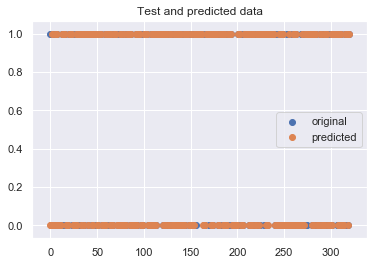

In [99]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, label="original")
plt.scatter(x_ax, rf_predict, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [ ]:
#The right kernel is linear because it's the most hight

In [85]:
#Estimation
from sklearn.svm import SVC
lin_svc = SVC(kernel="linear")
lin_svc.fit(X_train, y_train)
lin_svc=lin_svc.predict(X_test)

In [87]:
print(f'Model accuracy score: {round(accuracy_score(y_test, lin_svc) * 100, 2)}%')

Model accuracy score: 75.0%


In [ ]:
#The SVM model predict like logistic regression but less than the random forest regression
#The best model of the three model is the logistic regression

After made all of our three model , we notice that the best model is Random forest model, the accuracy of these is more than 80%.